In [1]:
import pandas as pd
import numpy as np


In [2]:
path = "Membership.csv"
df = pd.read_csv(path)
df.head()

,membership_id,membership_amount,currency,renewal_cycle,membership_plan,creation_date,email,company,billing_address,key_account_manager,animation_team
0,1.0,499.0,USD,Monthly,Custom,"April 25, 2019",nikole-jennings69@mail.com,"Bayer, Gleason and Macejkovic","68914 Rebeca Islands, Suite 318, 95363-5579, L...",Sapu Jagad,Gundala
1,2.0,5952.0,DKK,Quarterly,Custom,"May 14, 2019",kasen_baird20@gmail.com,Schmidt - Klocko,"706 Cassin Summit, Suite 736, 96164-9352, Stol...",Sapu Jagad,Gundala
2,4.0,499.0,USD,Quarterly,Custom,"June 6, 2019",bauman-pat70@outlook.com,Jacobson - Blick,"6818 Gislason Spur, Apt. 182, 19946-5653, New ...",Alice,Gundala
3,5.0,699.0,USD,Quarterly,Bronze,"June 6, 2019",garza-kylan2@hotmail.com,Buckridge - Beier,"5784 Kira Drive, Suite 367, 62845, Kamryntown,...",Alice,Gundala
4,6.0,1666.0,USD,6 Month,Silver,"June 6, 2019",jaydon-hurley88@yahoo.com,Hermann Inc,"99293 Hildegard Loop, Suite 156, 67602-2074, R...",George,Ironman


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   membership_id        248 non-null    float64
 1   membership_amount    248 non-null    float64
 2   currency             248 non-null    object 
 3   renewal_cycle        248 non-null    object 
 4   membership_plan      248 non-null    object 
 5   creation_date        248 non-null    object 
 6   email                248 non-null    object 
 7   company              248 non-null    object 
 8   billing_address      248 non-null    object 
 9   key_account_manager  248 non-null    object 
 10  animation_team       248 non-null    object 
dtypes: float64(2), object(9)
memory usage: 21.5+ KB


In [4]:
print(df.isna().sum())

membership_id          1
membership_amount      1
currency               1
renewal_cycle          1
membership_plan        1
creation_date          1
email                  1
company                1
billing_address        1
key_account_manager    1
animation_team         1
dtype: int64


In [5]:
df.dropna(inplace=True)
print(df.isna().sum())

membership_id          0
membership_amount      0
currency               0
renewal_cycle          0
membership_plan        0
creation_date          0
email                  0
company                0
billing_address        0
key_account_manager    0
animation_team         0
dtype: int64


In [6]:
df['membership_id'] = df['membership_id'].astype('int64')
df['creation_date'] = pd.to_datetime(df['creation_date'])

In [7]:
gold_membership_count = df['membership_plan'].value_counts().get('Gold', 0)

print(gold_membership_count)

14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   membership_id        248 non-null    int64         
 1   membership_amount    248 non-null    float64       
 2   currency             248 non-null    object        
 3   renewal_cycle        248 non-null    object        
 4   membership_plan      248 non-null    object        
 5   creation_date        248 non-null    datetime64[ns]
 6   email                248 non-null    object        
 7   company              248 non-null    object        
 8   billing_address      248 non-null    object        
 9   key_account_manager  248 non-null    object        
 10  animation_team       248 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 23.2+ KB


In [9]:
# Convert to USD
conversion_rates = {'DKK': 0.15, 'USD': 1.0, 'EUR': 1.09, 'GBP': 1.27}

df['charge_amount_usd'] = df.apply(lambda row: row['membership_amount'] * conversion_rates[row['currency']], axis=1)

df.head()

,membership_id,membership_amount,currency,renewal_cycle,membership_plan,creation_date,email,company,billing_address,key_account_manager,animation_team,charge_amount_usd
0,1,499.0,USD,Monthly,Custom,2019-04-25,nikole-jennings69@mail.com,"Bayer, Gleason and Macejkovic","68914 Rebeca Islands, Suite 318, 95363-5579, L...",Sapu Jagad,Gundala,499.0
1,2,5952.0,DKK,Quarterly,Custom,2019-05-14,kasen_baird20@gmail.com,Schmidt - Klocko,"706 Cassin Summit, Suite 736, 96164-9352, Stol...",Sapu Jagad,Gundala,892.8
2,4,499.0,USD,Quarterly,Custom,2019-06-06,bauman-pat70@outlook.com,Jacobson - Blick,"6818 Gislason Spur, Apt. 182, 19946-5653, New ...",Alice,Gundala,499.0
3,5,699.0,USD,Quarterly,Bronze,2019-06-06,garza-kylan2@hotmail.com,Buckridge - Beier,"5784 Kira Drive, Suite 367, 62845, Kamryntown,...",Alice,Gundala,699.0
4,6,1666.0,USD,6 Month,Silver,2019-06-06,jaydon-hurley88@yahoo.com,Hermann Inc,"99293 Hildegard Loop, Suite 156, 67602-2074, R...",George,Ironman,1666.0


In [10]:
# extract Country State from Billing Addres
df['country_state'] = df['billing_address'].str.extract(r',\s*([^,]+),\s*United States$')

df[['billing_address', 'country_state']]

,billing_address,country_state
0,"68914 Rebeca Islands, Suite 318, 95363-5579, L...",Oklahoma
1,"706 Cassin Summit, Suite 736, 96164-9352, Stol...",Massachusetts
2,"6818 Gislason Spur, Apt. 182, 19946-5653, New ...",Massachusetts
3,"5784 Kira Drive, Suite 367, 62845, Kamryntown,...",Arkansas
4,"99293 Hildegard Loop, Suite 156, 67602-2074, R...",Montana
...,...,...
243,"476 Hazle Circle, Apt. 920, 20903, West Estell...",West Virginia
244,"411 Gleason Passage, Apt. 343, 04752, West Ros...",Montana
245,"2339 O'Connell Curve, Apt. 460, 10518, Jedboro...",Michigan
246,"95414 Reilly Meadows, Apt. 615, 07659, Port Ne...",Nebraska


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   membership_id        248 non-null    int64         
 1   membership_amount    248 non-null    float64       
 2   currency             248 non-null    object        
 3   renewal_cycle        248 non-null    object        
 4   membership_plan      248 non-null    object        
 5   creation_date        248 non-null    datetime64[ns]
 6   email                248 non-null    object        
 7   company              248 non-null    object        
 8   billing_address      248 non-null    object        
 9   key_account_manager  248 non-null    object        
 10  animation_team       248 non-null    object        
 11  charge_amount_usd    248 non-null    float64       
 12  country_state        248 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(

In [12]:
dfviz = df.copy()

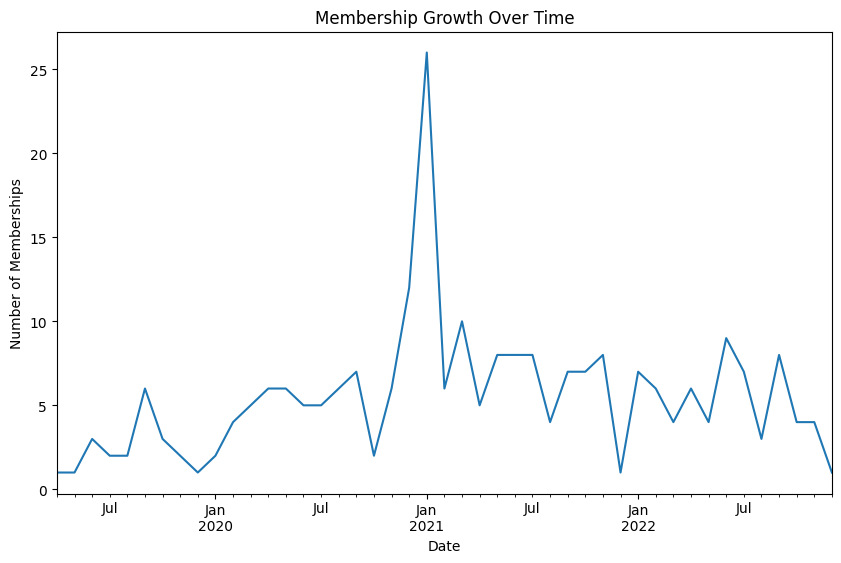

In [13]:
import matplotlib.pyplot as plt


dfviz.set_index('creation_date', inplace=True)
membership_growth_over_time = dfviz.resample('M')['membership_id'].count()

plt.figure(figsize=(10, 6))
membership_growth_over_time.plot(title='Membership Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Memberships')
plt.show()


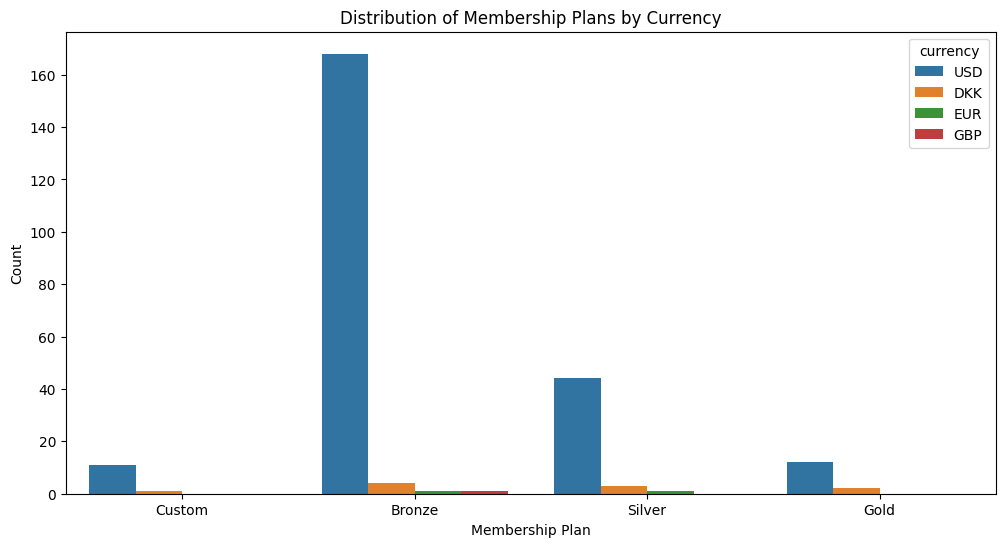

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='membership_plan', data=dfviz, hue='currency')
plt.title('Distribution of Membership Plans by Currency')
plt.xlabel('Membership Plan')
plt.ylabel('Count')
plt.show()


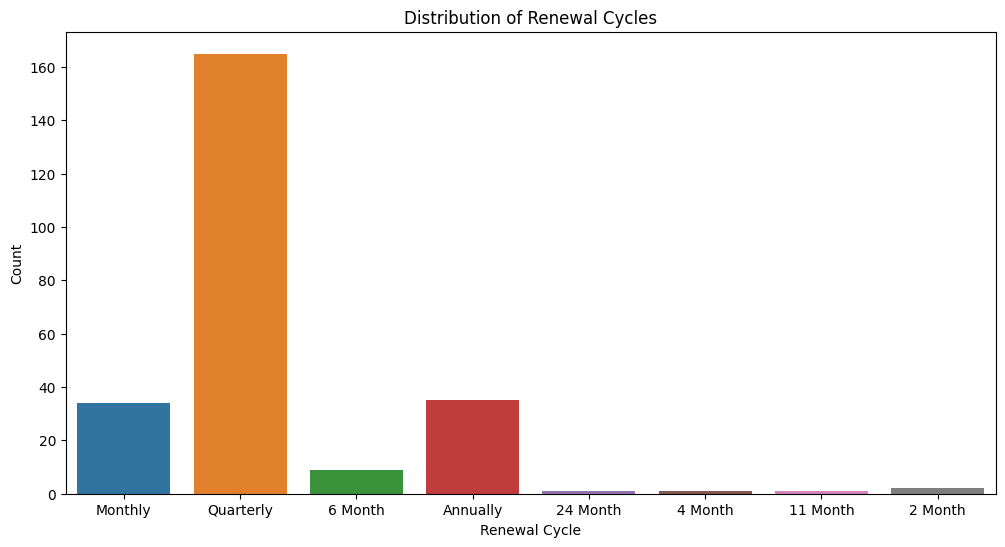

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='renewal_cycle', data=dfviz)
plt.title('Distribution of Renewal Cycles')
plt.xlabel('Renewal Cycle')
plt.ylabel('Count')
plt.show()


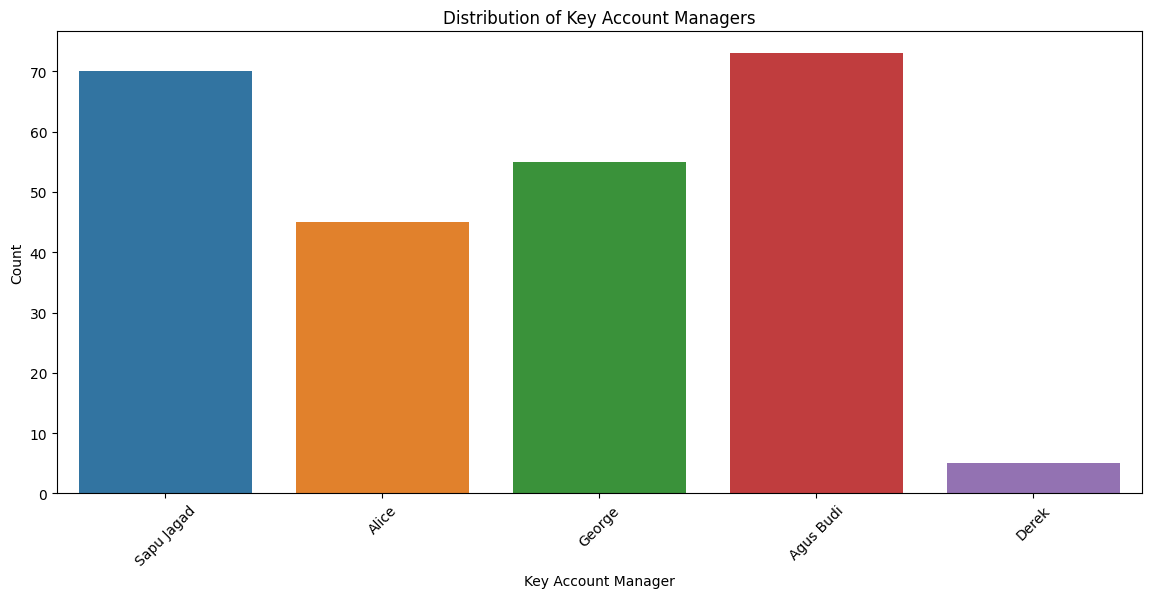

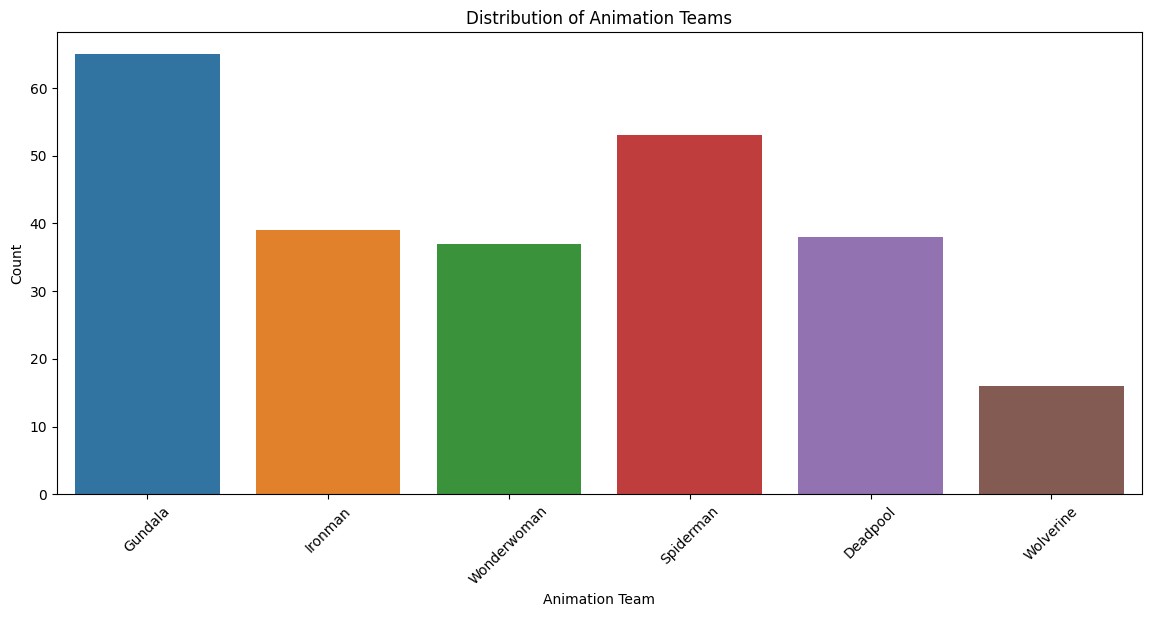

In [16]:
plt.figure(figsize=(14, 6))
sns.countplot(x='key_account_manager', data=dfviz)
plt.title('Distribution of Key Account Managers')
plt.xlabel('Key Account Manager')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='animation_team', data=dfviz)
plt.title('Distribution of Animation Teams')
plt.xlabel('Animation Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
df.head()

,membership_id,membership_amount,currency,renewal_cycle,membership_plan,creation_date,email,company,billing_address,key_account_manager,animation_team,charge_amount_usd,country_state
0,1,499.0,USD,Monthly,Custom,2019-04-25,nikole-jennings69@mail.com,"Bayer, Gleason and Macejkovic","68914 Rebeca Islands, Suite 318, 95363-5579, L...",Sapu Jagad,Gundala,499.0,Oklahoma
1,2,5952.0,DKK,Quarterly,Custom,2019-05-14,kasen_baird20@gmail.com,Schmidt - Klocko,"706 Cassin Summit, Suite 736, 96164-9352, Stol...",Sapu Jagad,Gundala,892.8,Massachusetts
2,4,499.0,USD,Quarterly,Custom,2019-06-06,bauman-pat70@outlook.com,Jacobson - Blick,"6818 Gislason Spur, Apt. 182, 19946-5653, New ...",Alice,Gundala,499.0,Massachusetts
3,5,699.0,USD,Quarterly,Bronze,2019-06-06,garza-kylan2@hotmail.com,Buckridge - Beier,"5784 Kira Drive, Suite 367, 62845, Kamryntown,...",Alice,Gundala,699.0,Arkansas
4,6,1666.0,USD,6 Month,Silver,2019-06-06,jaydon-hurley88@yahoo.com,Hermann Inc,"99293 Hildegard Loop, Suite 156, 67602-2074, R...",George,Ironman,1666.0,Montana


In [19]:
df.to_csv(r'membership.csv', index=False)